<a href="https://colab.research.google.com/github/RifatMuhtasim/Data_Science/blob/main/Time_Series_Forecast_Model/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [18]:
df.columns=['month', 'sales']
df.sample(5)

,month,sales
54,1968-07,3965.0
25,1966-02,3006.0
37,1967-02,3088.0
65,1969-06,4677.0
82,1970-11,9842.0


In [19]:
df.drop(105, axis="index", inplace=True)
df.drop(106, axis="index", inplace=True)

In [20]:
# Convert Month into Datetime
df['month']=pd.to_datetime(df['month'])
df.set_index('month',inplace=True)

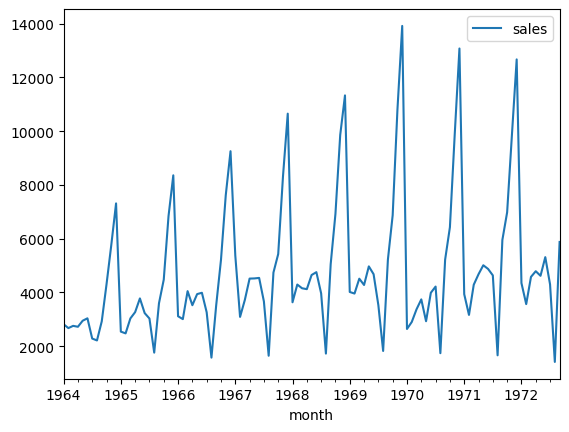

In [21]:
# Visualize the data
df.plot()
plt.show()

In [22]:
# Adfuller Test
from statsmodels.tsa.stattools import adfuller

# H0: It is non stationarity
# H1: It is stationarity

def Adfuller_test(data):
    result = adfuller(data)
    p_value = result[1]
    labels = ["ADF Test Statistic", "P-Value", "Lags Used", "Number of Observation Used"]
    for value, label in zip(result, labels):
        print(label + " : " + str(value))

    if p_value > 0.05:
        print("Fail to Reject the Null Hypothesis. Data is non Stationarity.")
    else:
        print("Reject the Null Hypothesis. Data is Stationarity.")

In [23]:
Adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276215
P-Value : 0.36391577166024586
Lags Used : 11
Number of Observation Used : 93
Fail to Reject the Null Hypothesis. Data is non Stationarity.


In [24]:
def Find_d_value_using_Adfuller_test(dataset, target):
    df = dataset.copy()
    df.rename(columns={target: 0}, inplace=True)

    def AdFuller_test(data):
        result = adfuller(data)
        p_value = result[1]
        return p_value

    for i in range(1, df.shape[0]):
        df[i] = df[i-1] - df[i-1].shift(1)
        p_value = AdFuller_test(df[i].dropna())

        if p_value <= 0.05:
            print("d-value: ", i)
            break

In [25]:
Find_d_value_using_Adfuller_test(dataset= df, target= 'sales')

d-value:  1


In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

def Find_pdq_value_on_ARIMA(dataset, target, lags):
    df = dataset.copy()
    df.rename(columns={target: 0}, inplace=True)

    def AdFuller_test(data):
        result = adfuller(data)
        p_value = result[1]
        return p_value

    def Pacf_Acf_Plot(data):
        fig = plt.figure(figsize=(12, 8))
        ax1 = fig.add_subplot(211)
        fig = sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax1)   # p-Value
        ax2 = fig.add_subplot(212)
        fig = sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax2)   # q-value
        plt.show()


    for i in range(1, df.shape[0]):
        df[i] = df[i-1] - df[i-1].shift(1)
        p_value = AdFuller_test(df[i].dropna())

        if p_value <= 0.05:
            print("d-value: ", i)
            Pacf_Acf_Plot(df[i].dropna())
            break

d-value:  1


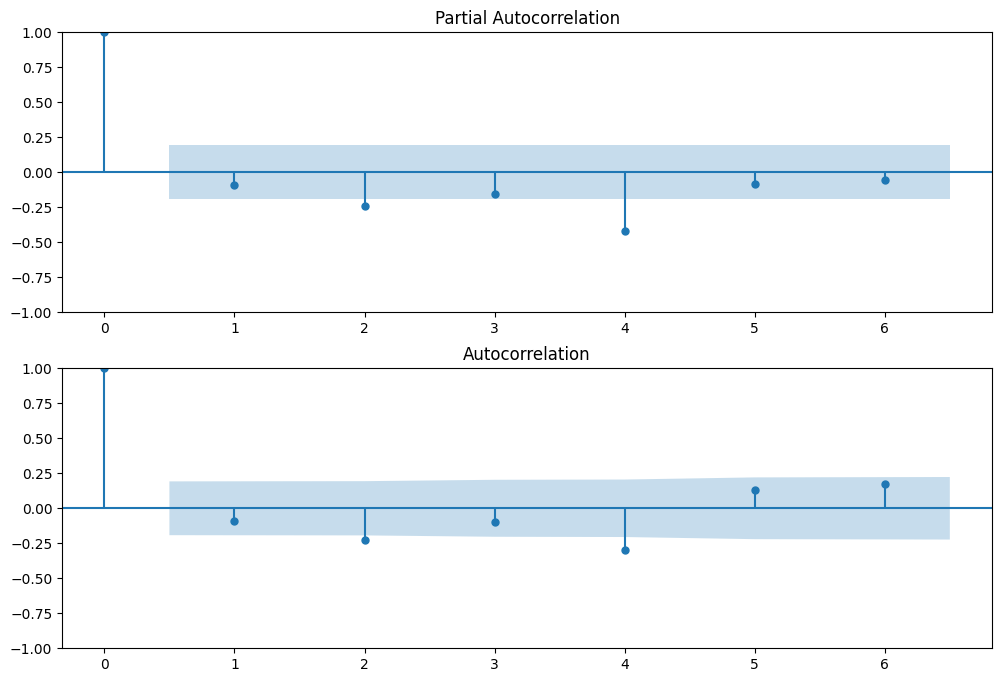

In [27]:
Find_pdq_value_on_ARIMA(dataset= df, target= 'sales', lags=6)

In [28]:
try:
    import pmdarima as pm
except ImportError:
    !pip install --quiet pmdarima
    import pmdarima as pm

def Find_best_arima_model_params(data):
    # Specify the parameter grid to search over
    p_values = range(0, 14)  # from 2 to 10
    q_values = range(0, 10)   # from 0 to 5

    # Perform a grid search over the parameter space
    model = pm.auto_arima(data,
                        start_p=0,
                        start_q=0,
                        test='adf',
                        max_p=15,
                        max_q=10,
                        d=1,  # Replace the d-value
                        seasonal=True,
                        trace=True,
                        suppress_warnings=True,
                        stepwise=True,
                        scoring='mse',  # Use Mean Squared Error for scoring
                        n_jobs=-1,      # Utilize all available CPU cores
                        p_values=p_values,
                        q_values=q_values)

    # Print the summary of the best model found
    print(model.summary())

In [29]:
Find_best_arima_model_params(df['sales'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.359 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Tue, 07 May 2024   AIC                           1935.750
Time:                        21:27:29   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Co

# SARIMAX

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['sales'], order=(0, 1, 0), seasonal_order= (0, 1, 0, 12) )
model_fit = model.fit()

# Forecast the next 10 steps
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted values for the next 10 steps:")
print(forecast)

Forecasted values for the next 10 steps:
1972-10-01     6907.0
1972-11-01     9777.0
1972-12-01    12596.0
1973-01-01     4274.0
1973-02-01     3490.0
1973-03-01     4503.0
1973-04-01     4714.0
1973-05-01     4544.0
1973-06-01     5238.0
1973-07-01     4224.0
Freq: MS, Name: predicted_mean, dtype: float64
